In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [53]:
df=pd.read_excel('C:/Users/munee/OneDrive/Desktop/DSA/iris.xls')

In [54]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [56]:
df.shape

(150, 5)

In [57]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

### Preprocessing steps

In [58]:
#checking for missing values
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [59]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

In [60]:
features_with_na

['SL', 'SW', 'PL']

In [61]:
#to find the mean of null values
for feature in features_with_na:
    print(feature, 'has', np.round(df[feature].isnull().mean(),2), '% of missing values')

SL has 0.05 % of missing values
SW has 0.04 % of missing values
PL has 0.04 % of missing values


In [62]:
df['SL']=df['SL'].fillna(df['SL'].median())
df['SW']=df['SW'].fillna(df['SW'].median())
df['PL']=df['PL'].fillna(df['PL'].median())

In [63]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

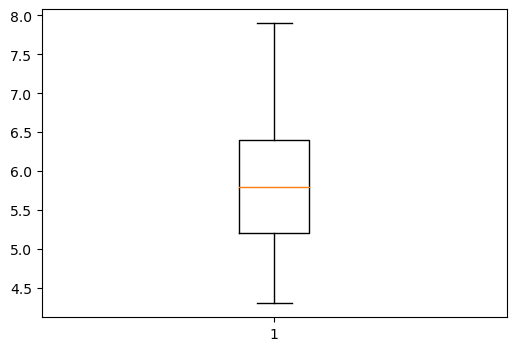

In [64]:
plt.figure(figsize=(6,4))
plt.boxplot(df['SL'])
plt.show()

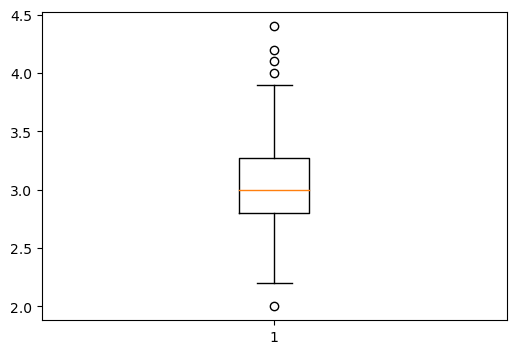

In [65]:
plt.figure(figsize=(6,4))
plt.boxplot(df['SW'])
plt.show()

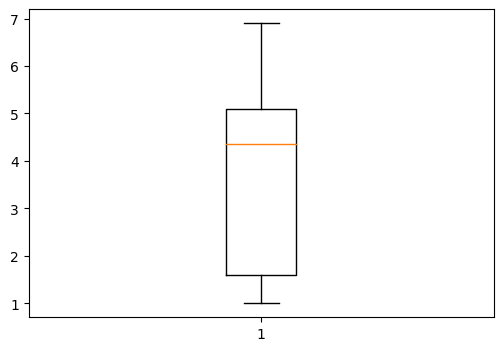

In [66]:
plt.figure(figsize=(6,4))
plt.boxplot(df['PL'])
plt.show()

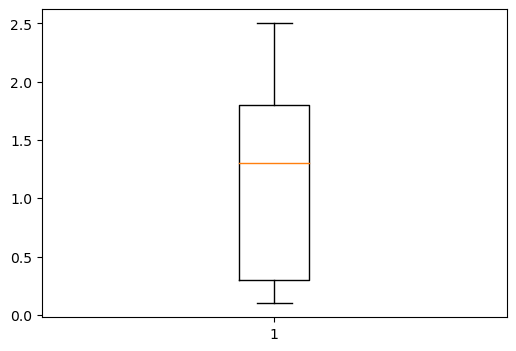

In [67]:
plt.figure(figsize=(6,4))
plt.boxplot(df['PW'])
plt.show()

In [68]:
#so from the above 'SW' has outliers--- It can be handled 

In [69]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
df["Classification"] = le.fit_transform(df["Classification"])

In [71]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [72]:
df.corr()

,SL,SW,PL,PW,Classification
SL,1.000000,-0.099107,0.830554,0.800939,0.774077
SW,-0.099107,1.000000,-0.405531,-0.338655,-0.403796
PL,0.830554,-0.405531,1.000000,0.936089,0.927509
PW,0.800939,-0.338655,0.936089,1.000000,0.956464
Classification,0.774077,-0.403796,0.927509,0.956464,1.000000


### Seperating features and target for Model creation

In [73]:
x=df.drop('Classification',axis=1)
y=df['Classification']

In [74]:
#importing necessary library

from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=42)

## Classification models

## LogisticRegression

In [76]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_log =  lr.fit(x_train, y_train)
y_pred_log  = model_log.predict(x_test)
y_pred_log

C:\Users\munee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [78]:
confusion_matrix(y_test,y_pred_log)


array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [79]:

accuracy_score(y_test, y_pred_log)

0.9736842105263158

## KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
metric_k  = []
neighbors = np.arange(3, 15)


for k in neighbors:
    knn       =  KNeighborsClassifier(n_neighbors = k)
    knn_model =  knn.fit(x_train,y_train)
    knn_pred  =  knn_model.predict(x_test)
    knn_acc   =  accuracy_score(y_test,knn_pred)
    metric_k.append(knn_acc)


C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

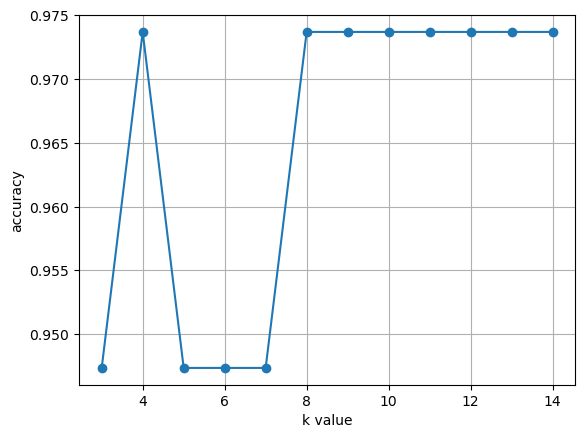

In [81]:
#plotting graph

plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()


##### checking with neighbor values equal to 4 and 6

In [82]:
knn_4       =  KNeighborsClassifier(n_neighbors = 4)
knn_model_4 =  knn_4.fit(x_train,y_train)
knn_pred_4  =  knn_model_4.predict(x_test)
knn_pred_4

C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [83]:
knn_6       =  KNeighborsClassifier(n_neighbors = 6)
knn_model_6 =  knn_6.fit(x_train,y_train)
knn_pred_6  =  knn_model_6.predict(x_test)
knn_pred_6


C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [84]:
confusion_matrix(y_test, knn_pred)


array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [85]:
accuracy_score(y_test, knn_pred)

0.9736842105263158

## SVM

In [86]:
from sklearn.svm import SVC
svm_clf= SVC(kernel='linear')
svm_model=svm_clf.fit(x_train,y_train)
y_pred_svm=svm_model.predict(x_test)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [88]:
confusion_matrix(y_test,y_pred_svm)


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [89]:
accuracy_score(y_test,y_pred_svm)

1.0

In [90]:
from sklearn.svm import SVC
svm_clf1= SVC(kernel='rbf')
svm_model1=svm_clf1.fit(x_train,y_train)
y_pred_svm1=svm_model1.predict(x_test)

In [91]:
confusion_matrix(y_test,y_pred_svm1)


array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [92]:
accuracy_score(y_test,y_pred_svm1)

0.9736842105263158

In [93]:
from sklearn.svm import SVC
svm_clf2= SVC(kernel='poly')
svm_model2=svm_clf2.fit(x_train,y_train)
y_pred_svm2=svm_model2.predict(x_test)

In [94]:
confusion_matrix(y_test,y_pred_svm2)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

In [95]:
accuracy_score(y_test,y_pred_svm2)

0.9736842105263158

### Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_model=dt_clf.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)

In [97]:
confusion_matrix(y_test,y_pred_dt)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [98]:
accuracy_score(y_test,y_pred_dt)

1.0

## Random forest 

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_model=rf_clf.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)

In [100]:
confusion_matrix(y_test,y_pred_rf)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [101]:
accuracy_score(y_test,y_pred_rf)

1.0

##  Desion Tree and Random Forest are the best models giving the highest accuracy of 1 



### SVM while using the linear kernel is giving accuracy of 1

### But SVM with Rbf and poly kernel is giving accuracy of 0.9736842105263158

### Also logistic regression and Knn is also giving accuracy of 0.9736842105263158